## Archisman Chakraborti
### Roll No 167
### Statistical Mechanics Computation Lab
### Assignment 4
### Date : 06/04/2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook", "grid"])
from scipy.integrate import quad, quad_vec
from scipy.constants import R, k
import sys

# Print versions
print("Python version: ", sys.version[:7])
print("Numpy version: ", np.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)

Python version:  3.11.2 
Numpy version:  1.23.5
Matplotlib version:  3.7.1


# Theory
---
---

## Dulong Petit Law
---
The Dulong-Petit model is a theoretical model used to predict the specific heat capacity of solids. It assumes that the solid is made up of independent, harmonic oscillators, each contributing an equal amount to the total heat capacity. The model is described by the following equation:

$$
C_V = 3R
$$

where $C_V$ is the molar heat capacity at constant volume, and $R$ is the gas constant.

This model works well at high temperatures, where thermal vibrations are large and the harmonic oscillator approximation is valid. However, at low temperatures, the specific heat capacity deviates from this prediction due to quantum mechanical effects and the interactions between the atoms in the solid.

---
## Einstein Model
---
The Einstein model is a theoretical model used to predict the specific heat capacity of solids at low temperatures, where the Dulong-Petit model fails. It assumes that the solid is made up of independent harmonic oscillators, but unlike the Dulong-Petit model, each oscillator has the same frequency. The model is described by the following equation:
$$C_V = 3Nk_B\left(\frac{\hbar\omega_E}{k_B T}\right)^2\frac{e^{\hbar\omega_E/k_B T}}{(e^{\hbar\omega_E/k_B T}-1)^2}$$
where $C_V$ is the molar heat capacity at constant volume, $N$ is the number of atoms in the solid, $k_B$ is the Boltzmann constant, $T$ is the temperature, $\hbar$ is the reduced Planck constant, and $\omega_E$ is the characteristic Einstein frequency of the solid.

The Einstein model predicts that the heat capacity approaches a constant value at low temperatures, which is proportional to the number of atoms in the solid. However, at high temperatures, the specific heat capacity approaches the classical limit predicted by the Dulong-Petit model.

---
## Debye Model
---
The Debye model is a theoretical model used to predict the specific heat capacity of solids at low temperatures, taking into account the fact that the atoms in the solid are not independent but are coupled through lattice vibrations. It assumes that the lattice vibrations can be treated as sound waves, and that the solid has a continuous distribution of frequencies rather than a single characteristic frequency as assumed by the Einstein model.

The Debye model predicts that the heat capacity approaches zero as the temperature approaches absolute zero, in agreement with experimental observations. The model is described by the following equation:

$$C_V = 9Nk_B\left(\frac{T}{\Theta_D}\right)^3\int_0^{\frac{\Theta_D}{T}}\frac{x^4e^x}{(e^x-1)^2}dx$$

where $C_V$ is the molar heat capacity at constant volume, $N$ is the number of atoms in the solid, $k_B$ is the Boltzmann constant, $T$ is the temperature, and $\Theta_D$ is the Debye temperature, which is related to the speed of sound in the solid and the spacing between atoms

First we define a class to get all the 3 models and all there parameters which may come handy in the future.

In [3]:
class Model:
    def __init__(self,  temp:np.ndarray, theta_E:float = None, 
                 theta_D:float = None) -> None:
        """ Initialise the class with the temperature array and
        einstein and debye temperatures(if given, in Kelvin.)
        Args:
            temp (np.ndarray): Temperature array in Kelvin
            theta_E (float, optional): Einstein temperature in Kelvin
            theta_D (float, optional): Debye temperature in Kelvin
        Returns:
            None"""
        self.theta_E = theta_E # in Kelvin
        self.temp = temp # in Kelvin
        self.theta_D = theta_D # in Kelvin

        if self.theta_E != None:
            self.x : np.ndarray = self.theta_E / self.temp

        if self.theta_D != None:
            self.x0 = self.theta_D / self.temp
            
    
    def Einstein_func(self) -> np.ndarray:
        """Returns the Einstein function for the given temperature array"""
        exp_factor = (np.exp(-self.x) / (1 - np.exp(-self.x)) ** 2)
        return self.x ** 2 * exp_factor
    
    def Debye_func(self) -> np.ndarray:
        def pseudo_func(x:np.ndarray):
            """Function to be integrated in Debye model"""
            exp_factor = (np.exp(-x) / (1 - np.exp(-x)) ** 2)
            return x**4 * exp_factor
        
        vals = [ (3 / (val ** 3)) * quad(pseudo_func, 0, val)[0] for val in self.x0]
        return np.array(vals)
    
    def Einstein_model(self) -> np.ndarray:
        """Returns the Einstein model for the given temperature array"""
        return 3 * R * self.Einstein_func()
    
    def Debye_model(self) -> np.ndarray:
        """Returns the Debye model for the given temperature array"""
        return 3 * R * self.Debye_func()
    
    def Dulong_Petit_model(self, ntimes:int) -> np.ndarray:
        """Returns the Dulong Petit function for the given temperature array"""
        return np.full(ntimes, 3 * R)

    
    def get_model(self, model:str) -> np.ndarray:
        """ Returns the model for a given model.
        Args:
            model (str): Model to be used. 
                         Options: "Einstein", "Debye"
        Returns:
            np.ndarray: Model for the given model"""
        if model == "Einstein":
            return self.Einstein_model()
        elif model == "Debye":
            return self.Debye_model()
        elif model == "Dulong":
            return self.Dulong_Petit_model(len(self.temp))
        else:
            raise ValueError("Invalid model")
    
    def plot_model(self, model, ax, linewidth = 1, linecolor = "red", 
                   linestyle = "--", label = None,  *args) -> plt.Axes:
        """Plots the model for a given model.
        Args:
            model (str): Model to be used. 
                         Options: "Einstein", "Debye", "Dulong"
            ax (plt.Axes): Axes to plot the model
            linewidth (int, optional): Line width of the plot
            linecolor (str, optional): Line color of the plot
            linestyle (str, optional): Line style of the plot
        Returns:
            plt.Axes: Plot of the model"""
        ax.plot(self.temp, self.get_model(model), linewidth = linewidth,
                color = linecolor, linestyle = linestyle, label = label)
        ax.locator_params(axis = "both", nbins = 30)
        ax.set_xlabel("Temperature (K)", *args)
        ax.set_ylabel(" Specific Heat (J/K/mol)", *args)
        ax.legend()


## Question 1
---

 Plot the Einstein’s specific heat and the Dulong-Petit law of specific heat of diamond for the temperature range 0 K to 2000 K. Take $\theta_E$, the Einstein temperature to be 1320 K and R, universal gas constant = 1.9872 cal/K-mol

In [4]:
# Constants
THETA_E : int = 1320 # Einstein temperature in Kelvin
temperature : np.ndarray = np.linspace(0.0001, 2000, 1000) # Temperature array in Kelvin

Text(0.5, 1.0, 'Einstein and Dulong Petit Models')

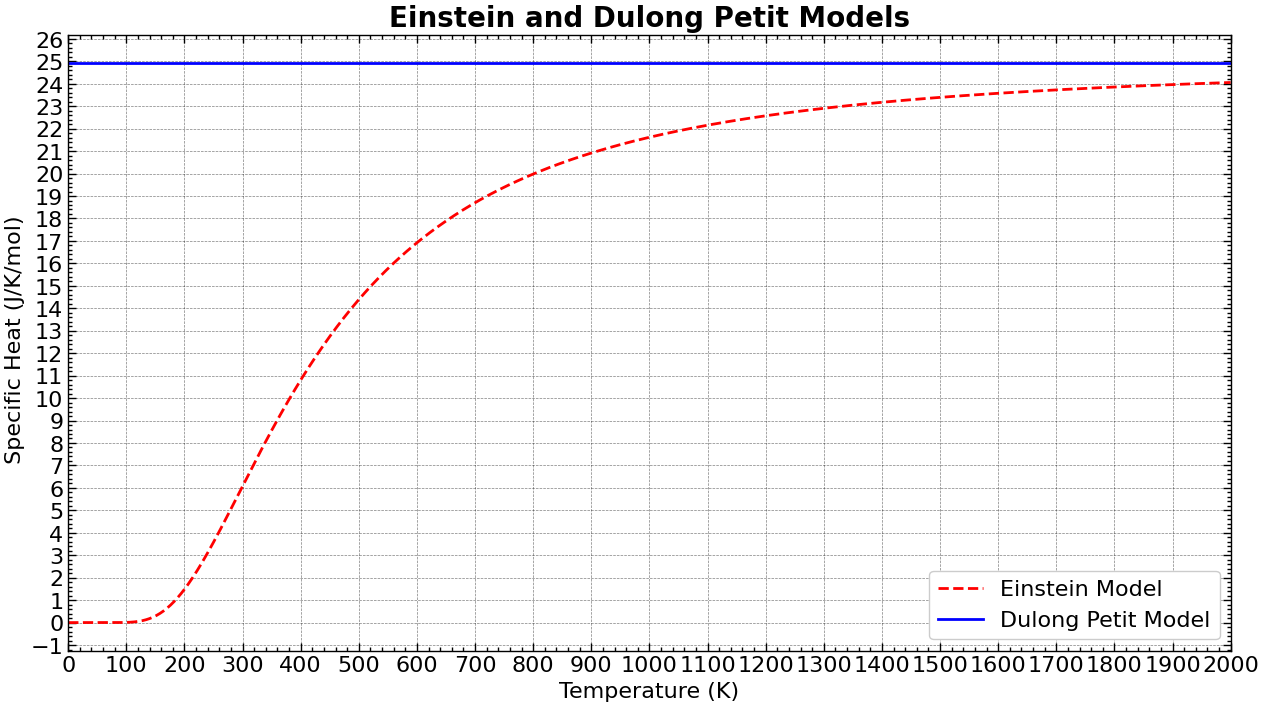

In [5]:
model = Model(temperature, theta_E = THETA_E)

fig, ax = plt.subplots(figsize = (15, 8))

# Plotting the Einstein model
model.plot_model("Einstein", ax, linewidth = 2, linecolor = "red", label="Einstein Model",
                    linestyle = "--")

# Plotting the Dulong Petit model
model.plot_model("Dulong", ax, linewidth = 2, linecolor = "blue", label="Dulong Petit Model",
                    linestyle = "-")
plt.xlim(0, 2000)
plt.title("Einstein and Dulong Petit Models", fontsize = 20, fontweight = "bold")

## Question 2
---
Plot the Debye specific heat for various solids in the temperature range 0 K to 700 K, taking 100 equi-spaced points. Use `quad` to integrate the Debye function. The Debye temperatures of the solids are listed below:

| Solid | Debye temperature (K) |
|:-----:|:---------------------:|
| Lead | 100 |
| Silver | 225 |
| Aluminium | 428 |
| Silicon | 645 |

Also plot the Dulong-Petit relation and compare.

Text(0.5, 1.0, 'Debye Model vs Dulong Petit Model')

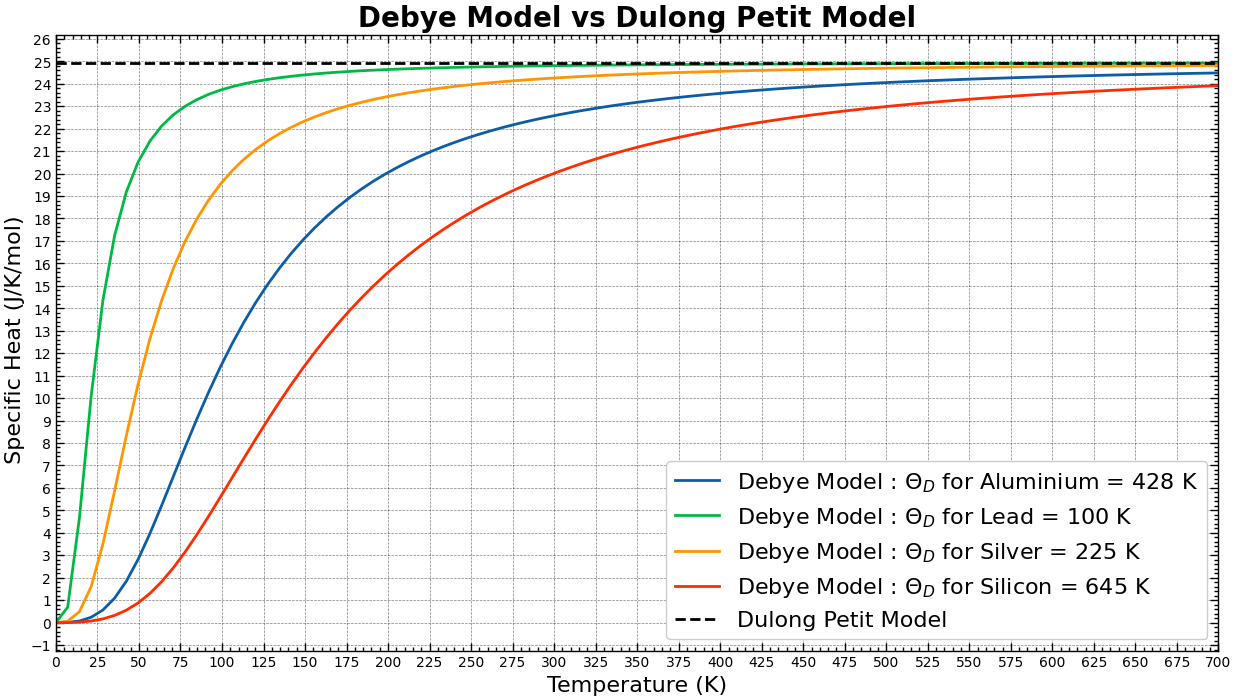

In [6]:
debye_temps : dict = {
    "Aluminium" : 428,
    "Lead" : 100, 
    "Silver" : 225, 
    "Silicon" : 645}

N_points : int = 100 # Number of points to plot
temperature : np.ndarray = np.linspace(0.0001, 700, N_points) # Temperature array in Kelvin

fig, ax = plt.subplots(figsize = (15, 8))

for idx, (element, debye_temp) in enumerate(debye_temps.items()):
    model = Model(temperature, theta_D = debye_temp)
    model.plot_model("Debye", ax, linewidth = 2, linecolor=f"C{idx}", linestyle="-",
                     label = f"Debye Model : $\Theta_D$ for {element} = {debye_temp} K")
    
# Plotting the Dulong Petit model
model.plot_model("Dulong", ax, linewidth = 2, linecolor = "k", label="Dulong Petit Model",
                    linestyle = "--")

plt.xlim(0, 700)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title("Debye Model vs Dulong Petit Model", fontsize = 20, fontweight = "bold")

## Question 3
---

Plot Einstein’s specific heat and Debye specific heat as a function of $T/\theta_D$ in the range 0 to 2 using 200 equi-spaced points. Also plot the Dulong-Petit Law for comparison.

---

We make a substitution 
$$
t = \frac{T}{\theta_D}
$$
where $T$ is the temperature in Kelvin and $\theta_D$ is the Debye temperature (in K).

The parameter for the einstein function $x = \frac{\theta_E}{T}$ becomes

$$
x = \frac{\theta_E}{\theta_D t}
$$

The parameter for the Debye Function $x_0 = \frac{\theta_D}{T}$ becomes

$$
x_0 = \frac{\theta_D}{\theta_D t} = \frac{1}{t}
$$
Everything is now in terms of $t$.
Everything else is the same as before.

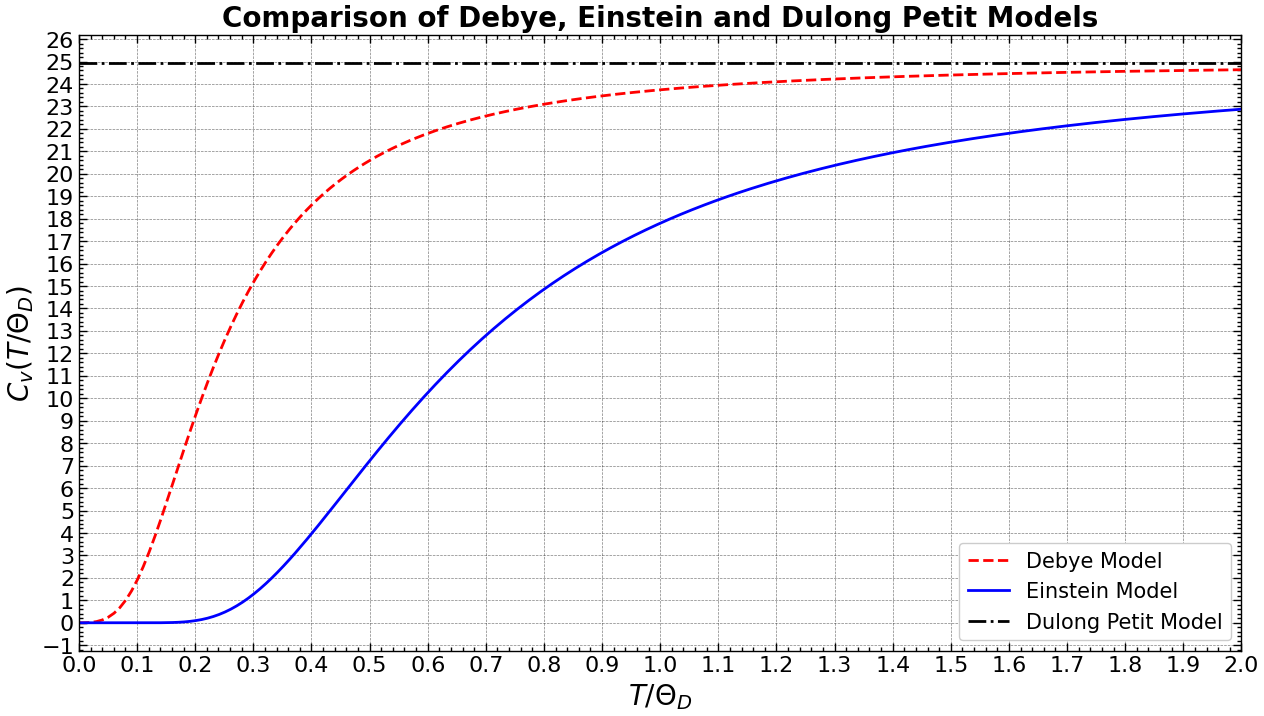

In [7]:
# Constants
N_points : int = 200
T_by_thetaD : np.ndarray = np.linspace(0.0001, 2, N_points) # unitless
thetaD : int = 645 # Kelvin
thetaE : int = 1320 # Kelvin

# Get temperature array from substitution
temperature : np.ndarray = T_by_thetaD * thetaD # Kelvin

# Initialise the model
model = Model(temperature, theta_E = thetaE, theta_D = thetaD)

# Getting the Debye, Einstein and Dulong Petit models
debye_vals = model.Debye_model() # Debye model
einstein_vals = model.Einstein_model() # Einstein model
dulong_vals = model.Dulong_Petit_model(ntimes=N_points) # Dulong Petit model

# Plotting the Debye and Einstein models and the Dulong Petit model
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(T_by_thetaD, debye_vals, linewidth = 2, color = "red", 
        linestyle = "--", label = "Debye Model")
ax.plot(T_by_thetaD, einstein_vals, linewidth = 2, color = "blue",
        linestyle = "-", label = "Einstein Model")
ax.plot(T_by_thetaD, dulong_vals, linewidth = 2, color = "black",
        linestyle = "-.", label = "Dulong Petit Model")
ax.set_xlabel("$T / \Theta_D$", fontsize = 20)
ax.set_ylabel("$C_v(T/ \Theta_D)$", fontsize = 20)
ax.locator_params(axis = "both", nbins = 30)
ax.legend(fontsize = 15)
ax.set_xlim(0, 2)
plt.title("Comparison of Debye, Einstein and Dulong Petit Models", 
          fontsize = 20, fontweight = "bold");